In [53]:
#cd /home/edrewke/FHDeX/exec/immersed_boundary/flagellum/

In [239]:
import sys, os, os.path
import glob

import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

yt.funcs.mylog.setLevel(50)

In [240]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [241]:
class SoA:
    _pref = "particle_"
    _pos  = "position_"
    _vel  = "vel"
    # New here
    _id   = "id"
    _cpu  = "cpu"
    _id_0 = "id_0"
    _cpu_0 = "cpu_0"
    
    def __init__(self, data):
        str_pos = self._pref+self._pos
        self.px = np.array(data[str_pos + "x"])
        self.py = np.array(data[str_pos + "y"])
        self.pz = np.array(data[str_pos + "z"])

        str_vel = self._pref+self._vel
        self.vx = np.array(data[str_vel + "x"])
        self.vy = np.array(data[str_vel + "y"])
        self.vz = np.array(data[str_vel + "z"])

        str_id = self._pref+self._id
        self.id = np.array(data[str_id])
        str_cpu = self._pref+self._cpu
        self.cpu = np.array(data[str_cpu])
        
        str_id_0 = self._pref+self._id_0
        self.id_0 = np.array(data[str_id_0])
        str_cpu_0 = self._pref+self._cpu_0
        self.cpu_0 = np.array(data[str_cpu_0])
 
    # new here
    def __str__(self):
        return "{pos:"  + str(self.px) + "," + str(self.py) + "," + str(self.pz) + \
              "; vel:"  + str(self.vx) + "," + str(self.vy) + "," + str(self.vz) + \
              "; id:"   + str(self.id) + ", cpu:" + str(self.cpu) + ", id_0:" + str(self.id_0) + ", cpu_0:" + str(self.cpu_0) + "," + "}"


    def __repr__(self):
        return str(self)


# new here
class Particle:
    def __init__(self, px, py, pz, vx, vy, vz, id, cpu, id_0, cpu_0):
        self.pos = np.array([px, py, pz])
        self.vel = np.array([vx, vy, vz])
        self.id  = np.array(id)
        self.cpu  = np.array(cpu)
        self.id_0  = np.array(id_0)
        self.cpu_0  = np.array(cpu_0)

    def __str__(self):
        return "P(" + str(self.pos) + "," + str(self.vel) + "," + str(self.id) + "," + str(self.cpu) + "," + str(self.id_0) + "," + str(self.cpu_0) + "," + ")"
    

    def __repr__(self):
        return str(self)


class AoS:
    def __init__(self, amrex_data):
        self.particles = list()
        soa = SoA(amrex_data)
        # new here        
        data = zip(soa.px, soa.py, soa.pz, soa.vx, soa.vy, soa.vz, soa.id, soa.cpu, soa.id_0, soa.cpu_0)
        for elt in data:
            self.particles.append(Particle(* elt))




In [242]:
data_root = "."
data_dir  = "."

In [243]:
data_path = os.path.join(data_root, data_dir)

In [286]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [287]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()
print(data_files)

['././plt0000000', '././plt0000000.old.80838894844', '././plt0000100', '././plt0000200', '././plt0000300', '././plt0000400', '././plt0000500', '././plt0000600', '././plt0000700', '././plt0000800', '././plt0000900', '././plt0001000', '././plt0001100', '././plt0001200', '././plt0001300', '././plt0001400', '././plt0001500', '././plt0001600', '././plt0001700', '././plt0001800', '././plt0001900', '././plt0002000', '././plt0002100', '././plt0002200', '././plt0002300', '././plt0002400', '././plt0002500', '././plt0002600', '././plt0002700', '././plt0002800', '././plt0002900', '././plt0003000', '././plt0003100', '././plt0003200', '././plt0003300', '././plt0003400', '././plt0003500', '././plt0003600', '././plt0003700', '././plt0003800', '././plt0003900', '././plt0004000', '././plt0004100', '././plt0004200', '././plt0004300', '././plt0004400', '././plt0004500', '././plt0004600', '././plt0004700', '././plt0004800', '././plt0004900', '././plt0005000', '././plt0005100', '././plt0005200', '././plt000


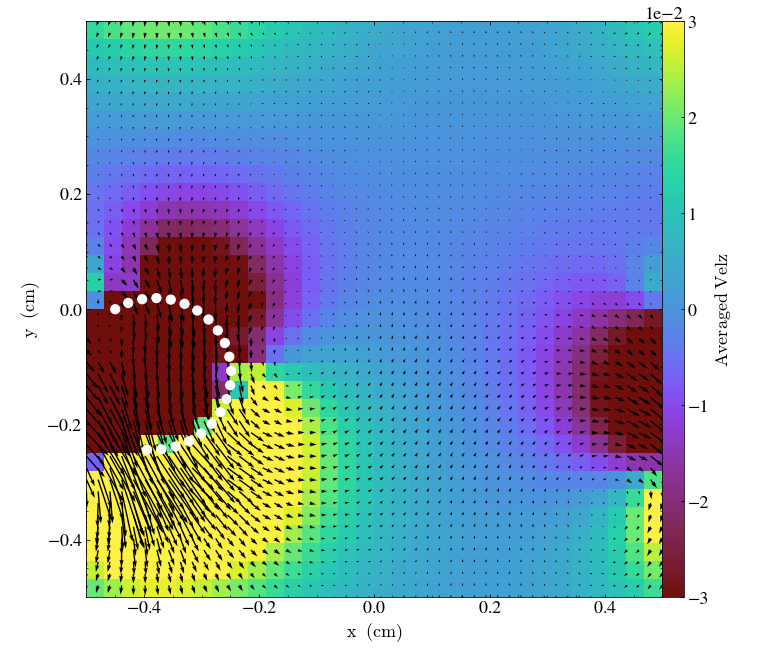

In [288]:
yt.funcs.mylog.setLevel(50)

ds = yt.load(data_files[-1])

amrex_ds = AMReXDataset(data_files[-1])
ad = amrex_ds.all_data()
aos = AoS(ad)

slc = yt.SlicePlot(ds, "z", "averaged_velz")

slc.set_log("averaged_velx", False)
slc.set_log("averaged_vely", False)
slc.set_log("averaged_velz", False)
slc.set_zlim('averaged_velz', -0.03, .03)

slc.annotate_quiver("averaged_velx", "averaged_vely")

for j, part in enumerate(aos.particles):
    p = part.pos
    p.tolist()
    slc.annotate_sphere(p, radius=(.008), circle_args={'fill':True, 'color':'white'})
    #slc.annotate_marker(p,plot_args={'color':'black'})

slc.show()

In [289]:
len(data_files)

302

In [290]:
yt.funcs.mylog.setLevel(50)

for i, data_file in enumerate(data_files):
    frame_file = "frame_" + str(i).zfill(5) + ".png"

    if os.path.isfile(frame_file):
        continue
    else:
        print("Working on: {frame_file} ")

    ds = yt.load(data_file)
    
    amrex_ds = AMReXDataset(data_file)
    ad = amrex_ds.all_data()
    aos = AoS(ad)
    
    
        
    slc = yt.SlicePlot(ds, "z", "averaged_velz")
    
    slc.set_log("averaged_velx", False)
    slc.set_log("averaged_vely", False)
    slc.set_log("averaged_velz", False)
    slc.set_zlim('averaged_velz', -0.03, .03)
    
    slc.annotate_quiver("averaged_velx", "averaged_vely")
    
    for j, part in enumerate(aos.particles):
        p = part.pos
        p.tolist()
        slc.annotate_sphere(p, radius=(.008), circle_args={'fill':True, 'color':'white'})
        #slc.annotate_marker(p,plot_args={'color':'black'})
    
    slc.save(frame_file)

Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: {frame_file} 
Working on: 

In [254]:
ds.field_list

[('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'divergence'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'tracer')]

In [238]:
ds.particle_field_by_type


AttributeError: 'BoxlibDataset' object has no attribute 'particle_field_by_type'

In [ ]:
ad = ds.all_data()
aos = AoS(ad)

In [ ]:
for i, part in enumerate(aos.particles):
    print(part.pos)

In [ ]:
p = aos.particles[1]


In [ ]:
p.annotate_sphere([0.5, 0.5, 0.5], radius=(2, 'kpc'),
                  circle_args={'color':'black'})

In [ ]:
p


In [ ]:
# ffmpeg -pattern_type glob -i "frame_*.png" -r 24 -c:v libx264 sinewavevideo.mpeg